In [1]:
%pylab inline
import cPickle
import numpy as np
import fool

/usr/local/lib/python2.7/dist-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/joel/code/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for std::vector<int, std::allocator<int> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver


Populating the interactive namespace from numpy and matplotlib
loading dummy...


/home/joel/code/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for std::vector<float, std::allocator<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver


In [22]:
niche_matrix,niche_names=cPickle.load(open("nodecalc/niche_calc.pkl","rb"))
data=[]

data = cPickle.load(open("fool24.pkl","rb"))

In [23]:
elite_score,elite_map,evals,history,elite_extra,plots=data

(25, 1413, 6)


(array([ 104.,   71.,   59.,   52.,   36.,   33.,   29.,   37.,   30.,
          20.,   19.,   20.,   18.,   17.,   20.,   22.,   19.,   13.,
          24.,    7.,   16.,    9.,    3.,   10.,   11.,   16.,   17.,
           7.,    8.,    7.,    8.,    9.,    9.,   10.,    7.,    5.,
           8.,   15.,   11.,    7.,    4.,    8.,   12.,    9.,    3.,
           6.,    2.,   10.,    9.,   11.,    7.,    5.,   10.,   12.,
           7.,    9.,    6.,    6.,    6.,    4.,    6.,    7.,    4.,
           3.,    5.,   11.,    5.,    5.,    2.,    8.,    2.,    8.,
           8.,   11.,    7.,   12.,   12.,    4.,    5.,   10.,    3.,
           3.,    7.,   13.,    6.,    8.,    6.,    7.,   11.,   11.,
          12.,    6.,   15.,    7.,   17.,    7.,   19.,   18.,   26.,   87.]),
 array([  5.38514578e-04,   1.05331484e-02,   2.05277823e-02,
          3.05224162e-02,   4.05170500e-02,   5.05116839e-02,
          6.05063177e-02,   7.05009516e-02,   8.04955855e-02,
          9.04902193e-02

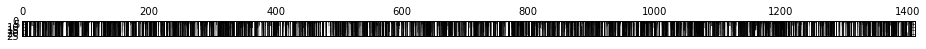

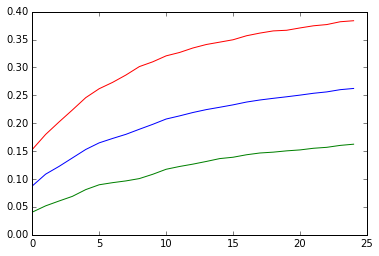

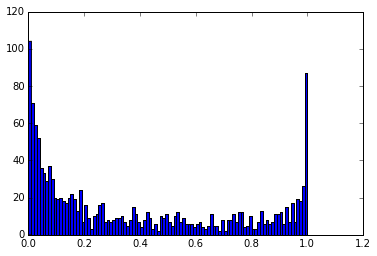

In [31]:
pnew = np.array(plots)
print pnew.shape
plt.gray()

meanscores = pnew.mean(2)
minscores = pnew.min(2)
maxscores = pnew.max(2)
plt.matshow(meanscores)
plt.figure()
plt.plot(meanscores.mean(axis=1))
plt.plot(minscores.mean(axis=1))
plt.plot(maxscores.mean(axis=1))
plt.figure()
plt.hist(maxscores[-1],bins=100)


In [72]:
import networkx as nx
print len(history.nodes())
node = history.nodes()[-1]

anc= nx.ancestors(history,node)
dec= nx.descendants(history,node)

print in_edge

in_edge=history.in_edges([node])
out_edge=history.out_edges([node])

in_nodes = [(k[0],history.get_edge_data(k[0],k[1])) for k in in_edge]
out_nodes = [k[1] for k in out_edge]

print node
print in_nodes,out_nodes

subg = history.subgraph([node]+list(anc)+list(dec))
subg = history.subgraph([node]+in_nodes+out_nodes)

plt.figure(figsize=(14,14))
nx.draw(subg)

11750
[(<_MultiNEAT.Genome object at 0x7fed3014e4c8>, <_MultiNEAT.Genome object at 0x7fed3027aa48>), (<_MultiNEAT.Genome object at 0x7fed3014e4c8>, <_MultiNEAT.Genome object at 0x7fed3027aa48>), (<_MultiNEAT.Genome object at 0x7fed3014e4c8>, <_MultiNEAT.Genome object at 0x7fed3027aa48>), (<_MultiNEAT.Genome object at 0x7fed3014e4c8>, <_MultiNEAT.Genome object at 0x7fed3027aa48>), (<_MultiNEAT.Genome object at 0x7fed3014e4c8>, <_MultiNEAT.Genome object at 0x7fed3027aa48>), (<_MultiNEAT.Genome object at 0x7fed3014e4c8>, <_MultiNEAT.Genome object at 0x7fed3027aa48>)]
[(<_MultiNEAT.Genome object at 0x7fed3014e4c8>, {0: {'source_niche': 741, 'new_score': 5.3677125909900374e-17, 'target_niche': 162, 'old_score': 1.547826973823546e-18}, 1: {'source_niche': 741, 'new_score': 1.1052394109006935e-15, 'target_niche': 509, 'old_score': 5.0557938712729544e-18}, 2: {'source_niche': 741, 'new_score': 1.554157878155405e-13, 'target_niche': 741, 'old_score': 3.9797421367268951e-14}, 3: {'source_niche':

TypeError: not all arguments converted during string formatting

In [4]:


def get_complexity(genomes):
    links=[]
    nodes=[]
    for key in genomes.keys():
        links.append(genomes[key].NumLinks())
        nodes.append(genomes[key].NumNeurons())
    return float(sum(links))/len(links),float(sum(nodes))/len(nodes),max(nodes)

for k in range(63):
    genomes = data[k][1]                     
    print get_complexity(genomes)

(53.394904458598724, 16.440905874026893, 30)
(53.71479122434536, 16.504600141542817, 30)
(54.05590941259731, 16.574663835810334, 30)
(54.288039631988674, 16.6206652512385, 30)
(54.72823779193206, 16.685774946921445, 30)
(55.13305024769993, 16.767869780608635, 30)
(55.481245576786975, 16.83581033262562, 30)
(55.825902335456476, 16.88818117480538, 30)
(56.095541401273884, 16.94762915782024, 30)
(56.49115357395612, 17.002123142250532, 30)
(56.84359518754423, 17.066525123849964, 30)
(57.1104033970276, 17.116065109695683, 31)
(57.43595187544232, 17.172682236376502, 31)
(57.711960368011326, 17.21868365180467, 31)
(57.93701344656758, 17.24769992922859, 31)
(58.13871196036801, 17.27034677990092, 31)
(58.38358103326256, 17.318471337579616, 31)
(58.725406935598016, 17.389242745930645, 31)
(58.924982307147914, 17.425336164189666, 32)
(59.27883934890304, 17.48690728945506, 32)
(59.539278131634816, 17.553432413305025, 32)
(59.939844302901626, 17.61995753715499, 32)
(60.13729653220099, 17.6560509554

IndexError: list index out of range

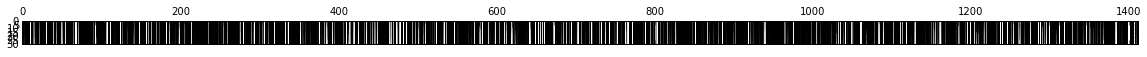

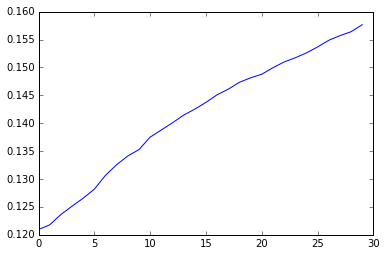

In [6]:
gray()
figure(figsize=(20,20))
matshow(score_array,fignum=0)
figure()


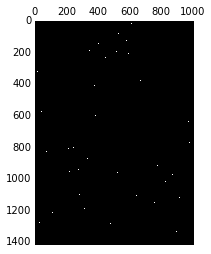

In [12]:
matshow(niche_matrix,fignum=0)

In [10]:



import image_rec
for score in scores[-1:]:
 sort_list=zip(score,range(score.shape[0]))
 sort_list.sort(reverse=True)
 for k in sort_list[:50]:
  print k,niche_names[k[1]] #image_rec.labels[k[1]][:30]
 #raw_input()

(0.99999880790763029, 1400) instrument.n.01
(0.99999880790763029, 1318) timepiece.n.01
(0.99999880790763029, 1288) device.n.01
(0.99999880790763029, 627) measuring_instrument.n.01
(0.99999880790763029, 337) hourglass.n.01
(0.99881973497429422, 524) airship.n.01
(0.99787366452453297, 695) balloon.n.01
(0.97591958058285522, 1009) pick.n.05
(0.97528349276938253, 226) pinwheel.n.02
(0.96983937129395648, 1240) parachute.n.01
(0.94590148334683088, 1209) plunger.n.03
(0.93927904662968975, 111) tennis_ball.n.01
(0.92193451387645409, 1155) nipple.n.02
(0.92193451387645409, 419) cap.n.02
(0.92193451387645409, 307) top.n.09
(0.91749812012083376, 464) goblet.n.01
(0.91749812012083376, 414) glass.n.02
(0.89354245309768421, 921) buckeye.n.01
(0.89354245309768421, 142) seed.n.01
(0.88701509474777296, 1060) coelenterate.n.01
(0.88701509474777296, 217) jellyfish.n.02
(0.88084141587108455, 655) conch.n.01
(0.87932412495495316, 703) spotlight.n.02
(0.87932412495495316, 30) source_of_illumination.n.01
(0.

In [7]:
print scores[0][1]

5.7102576001e-09


In [21]:
data = cPickle.load(open("nov49.pkl","rb"))

In [22]:
garchive,archive,genomes,behaviors = data
print len(genomes)

500


building...
dcalc
dcalc complete
calling batch... 23
complete
[0.21529193976894023, 0.11956405322998763, 0.43570407540537415]
[ 0.  0.  0.  0.]
rendering images
verts (1160, 3)
vertcols (1160, 3)
faces (2276, 3)
running image rec
building...
dcalc
dcalc complete
calling batch... 23
complete
[0.21529193976894023, 0.11956405322998763, 0.43570407540537415]
[ 0.  0.  0.  0.]
rendering images
verts (1160, 3)
vertcols (1160, 3)
faces (2276, 3)
running image rec
building...
dcalc
dcalc complete
calling batch... 25
complete
[0.14462693161331117, 0.013233406795188786, 0.11965252496302128]
[ 0.          0.0099014   0.00771452  0.        ]
rendering images
verts (794, 3)
vertcols (794, 3)
faces (1552, 3)
running image rec
building...
dcalc
dcalc complete
calling batch... 24
complete
[0.21529193976894023, 0.11956405322998763, 0.43570407540537415]
[ 0.  0.  0.  0.]
rendering images
verts (708, 3)
vertcols (708, 3)
faces (1384, 3)
running image rec
building...
dcalc
dcalc complete
calling batch... 2

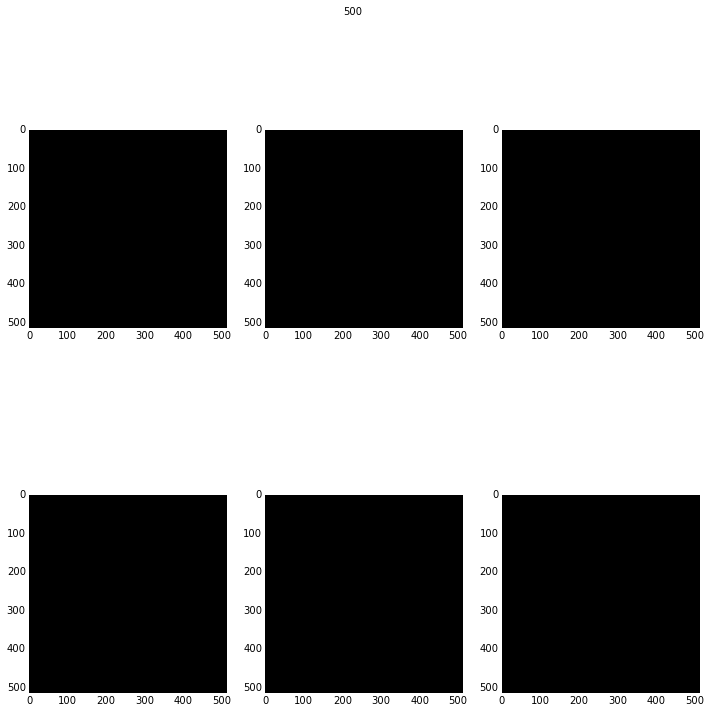

In [20]:
plt.figure(figsize=(12,12))
for idx in range(len(genomes)):
 imgs,res = fool.evaluate(genomes[idx],debug=True,save="out/nov%d.ply"%idx)
 fool.save_render_plot(imgs,str(idx),save="out/nov%d.png"%idx)

(500, 1024)


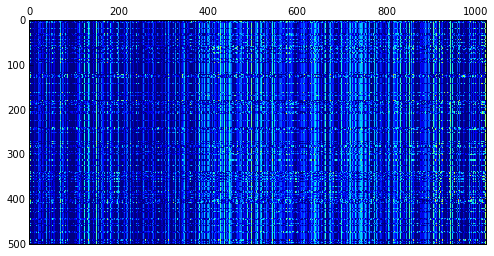

In [23]:
beh = np.array(behaviors)
print beh.shape
plt.figure(figsize=(15,15))
plt.matshow(beh)

In [15]:
print beh.max()

3.90553


In [16]:
print beh.min()

0.0
